In [1]:
# Step 1: Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 2: Download and load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

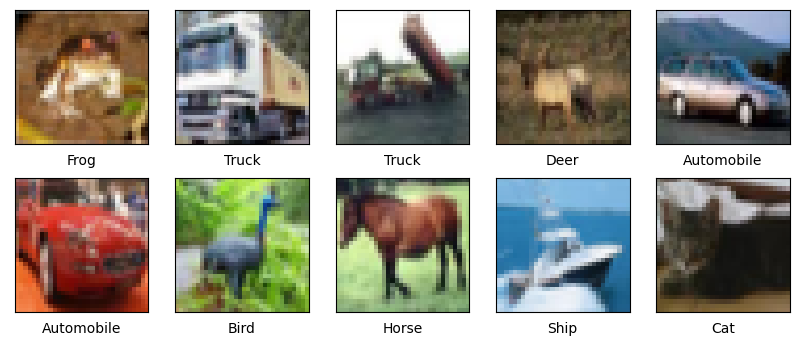

In [3]:
# Step 3: Visualize some sample images
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [4]:
# Step 4: Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert class labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
# Build CNN with BatchNorm + Dropout
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [6]:
# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [8]:
# Step 7: Train the model
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),
                    batch_size=64)

Epoch 1/20
782/782 [==============================] - 126s 157ms/step - loss: 1.5790 - accuracy: 0.4517 - val_loss: 1.0689 - val_accuracy: 0.6234
Epoch 2/20
782/782 [==============================] - 120s 154ms/step - loss: 1.0250 - accuracy: 0.6380 - val_loss: 0.9141 - val_accuracy: 0.6828
Epoch 3/20
782/782 [==============================] - 152s 195ms/step - loss: 0.8553 - accuracy: 0.7008 - val_loss: 0.7837 - val_accuracy: 0.7292
Epoch 4/20
782/782 [==============================] - 156s 200ms/step - loss: 0.7542 - accuracy: 0.7386 - val_loss: 0.8481 - val_accuracy: 0.7181
Epoch 5/20
782/782 [==============================] - 160s 205ms/step - loss: 0.6753 - accuracy: 0.7665 - val_loss: 0.7330 - val_accuracy: 0.7536
Epoch 6/20
782/782 [==============================] - 175s 224ms/step - loss: 0.6204 - accuracy: 0.7872 - val_loss: 0.6100 - val_accuracy: 0.7891
Epoch 7/20
782/782 [==============================] - 162s 207ms/step - loss: 0.5701 - accuracy: 0.8046 - val_loss: 0.5925 -

In [9]:
# Step 8: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 8s - loss: 0.5355 - accuracy: 0.8395 - 8s/epoch - 24ms/step

Test Accuracy: 0.8395
Test Loss: 0.5355


In [10]:
# Step 9: Perform predictions on test images
predictions = model.predict(x_test)

313/313 [==============================] - 8s 24ms/step


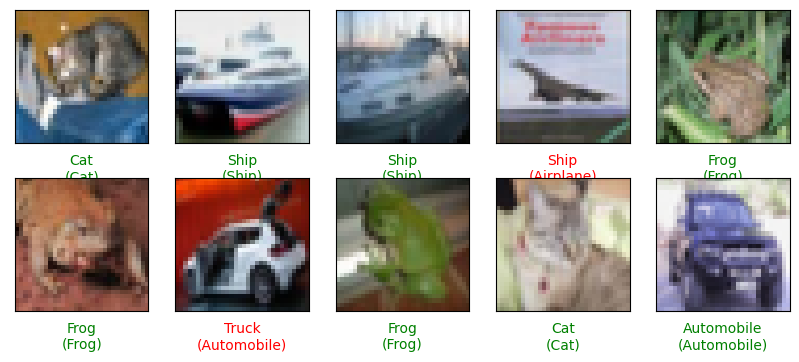

In [11]:
# Step 10: Visualize predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]}\n({class_names[true_label]})", color=color)
plt.show()